In [362]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_docs.plots
import tensorflow_docs.modeling
import tensorflow_docs as tfdocs

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

ModuleNotFoundError: No module named 'tensorflow_docs'

## Data Import & Preparation

In [350]:
df = pd.read_csv('data.csv')
df = df.drop(['raw', 'meditation'], axis=1)
df = df[(df.attention > 0) & (df.attention < 100)]
df.attention = df.attention / 100

df

,attention,delta,theta,low-alpha,high-alpha,low-beta,high-beta,low-gamma,mid-gamma
4,0.30,555424,228268,41426,20773,9552,4258,4553,9046
5,0.40,361641,203589,33347,61300,12438,24623,16331,36168
6,0.47,604167,273762,54757,23296,39253,24968,37750,27146
7,0.56,547847,189739,18314,32144,51886,22279,13328,22866
8,0.74,1320032,115127,54336,8408,25416,13697,10791,57787
...,...,...,...,...,...,...,...,...,...
485,0.27,245766,176489,28284,18742,34710,8769,7469,75588
486,0.50,89819,22665,18075,11821,18650,8952,8648,64470
487,0.44,1269525,84596,24241,13691,20201,9176,6696,68357
488,0.54,504223,42898,21910,19481,20520,26704,15849,76008


In [351]:
train_set = np.array(df.drop('attention', axis=1))
test_set = np.array(df[['attention']])

scaler = MinMaxScaler()
train_set = scaler.fit_transform(train_set)

X_train, X_test, y_train, y_test = train_test_split(train_set, test_set, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361, 8), (91, 8), (361, 1), (91, 1))

## Model

In [352]:
def feedforward_nnet():
    clear_session()
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1))
    return model

model = feedforward_nnet()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [359]:
model.compile(optimizer=Adam(1e-4), loss='mae', metrics=['mae', 'mse'])
es = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=0)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0)
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=16, callbacks=[es, reduce_lr], verbose=2)

Epoch 1/200
18/18 - 0s - loss: 0.1560 - mae: 0.1560 - mse: 0.0397 - val_loss: 0.1448 - val_mae: 0.1448 - val_mse: 0.0332 - lr: 1.0000e-04
Epoch 2/200
18/18 - 0s - loss: 0.1559 - mae: 0.1559 - mse: 0.0397 - val_loss: 0.1447 - val_mae: 0.1447 - val_mse: 0.0332 - lr: 1.0000e-04
Epoch 3/200
18/18 - 0s - loss: 0.1557 - mae: 0.1557 - mse: 0.0396 - val_loss: 0.1450 - val_mae: 0.1450 - val_mse: 0.0332 - lr: 1.0000e-04
Epoch 4/200
18/18 - 0s - loss: 0.1557 - mae: 0.1557 - mse: 0.0396 - val_loss: 0.1448 - val_mae: 0.1448 - val_mse: 0.0331 - lr: 1.0000e-04
Epoch 5/200
18/18 - 0s - loss: 0.1554 - mae: 0.1554 - mse: 0.0395 - val_loss: 0.1450 - val_mae: 0.1450 - val_mse: 0.0331 - lr: 1.0000e-04
Epoch 6/200
18/18 - 0s - loss: 0.1553 - mae: 0.1553 - mse: 0.0394 - val_loss: 0.1450 - val_mae: 0.1450 - val_mse: 0.0331 - lr: 1.0000e-04
Epoch 7/200
18/18 - 0s - loss: 0.1552 - mae: 0.1552 - mse: 0.0394 - val_loss: 0.1449 - val_mae: 0.1449 - val_mse: 0.0330 - lr: 1.0000e-04
Epoch 8/200
18/18 - 0s - loss: 0.1

In [360]:
y_pred = model.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.15773971418758015

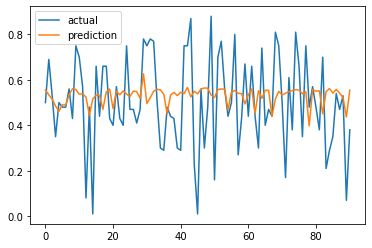

In [361]:
actual = [i[0] for i in y_test]
prediction = [i[0] for i in y_pred]

pd.DataFrame({'actual': actual, 'prediction': prediction}).plot()